# Base de Dados

A base de dados a ser analisada consiste em registros de acidentes de trânsito na cidade de Belo Horizonte. A base é separada em vários arquivos csv que podem ser lidos diretamente com babypandas. Para isso, use o código abaixo:

In [1]:
import babypandas as bpd
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

df = bpd.DataFrame()
for f in glob.glob('dados/*.csv'):
    aux = bpd.read_csv(f, sep=';')
    df = df.append(aux)

### Colando um índice de datas

Infelizmente, o BabyPandas não lida muito bem com datas. Por isso, vamos tratar as datas usando pandas. A função pd.to_datetime converte texto em datas, funcionando bem no nosso caso.

In [2]:
data_correta = pd.to_datetime(
    df.get('data hora_boletim').values
)

Agora basta colocar a data na coluna correta

In [3]:
df = df.assign(
    data_boletim = data_correta
)

### Removendo as colunas que não precisamos

Por fim, vamos remover todas as colunas desnecessárias e configurar um índice.

In [4]:
df = df.drop(
    columns=['data hora_boletim',
             'data_inclusao',
             'valor_ups',
             'valor_ups_antiga',
             'data_alteracao_smsa',
             'descricao_ups_antiga']
).sort_values(by='data_boletim').set_index('data_boletim')
df

,numero_boletim,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,...,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,descricao_ups,ano,mes,lat,lon,bairro
data_boletim,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:30:00,2016-008685542-001,H04000,QUEDA DE PESSOA DE VEICULO ...,0,NAO INFORMADO,0,NAO INFORMADO,21,NORDESTE,POLICIA CIVIL,...,610820.43,7801707.67,SIM,NÃO,NÃO INFORMADO,2016,1,-43.941446,-19.877669,Parque São João Batista
2016-01-01 01:00:00,2016-001865528-001,H06002,ATROPELAMENTO DE PESSOA SEM VITIMA FATAL ...,0,NAO INFORMADO,0,NAO INFORMADO,20,LESTE,POLICIA CIVIL,...,616043.53,7799563.76,SIM,NÃO,NÃO INFORMADO,2016,1,-43.891427,-19.896736,Casa Branca
2016-01-01 01:30:00,2016-014489036-001,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,23,NORTE,POLICIA CIVIL,...,610686.91,7805465.91,SIM,NÃO,NÃO INFORMADO,2016,1,-43.942946,-19.843720,Padre Júlio Maria
2016-01-01 02:55:00,2016-000009920-001,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,23,NORTE,POLICIA MILITAR,...,610958.28,7806566.34,SIM,NÃO,NÃO INFORMADO,2016,1,-43.940421,-19.833761,Santa Isabel
2016-01-01 03:00:00,2016-000207284-001,H09002,COLISAO DE VEICULOS COM VITIMA ...,1,BOM,1,ASFALTO,19,CENTRO-SUL,POLICIA CIVIL,...,611496.74,7793765.15,SIM,NÃO,NÃO INFORMADO,2016,1,-43.934506,-19.949393,Sion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:08:00,2022-057273258-001,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,23,NORTE,POLICIA MILITAR,...,612239.23,7810127.89,SIM,NÃO,NÃO INFORMADO,2022,12,-43.928406,-19.801509,Conjunto Zilah Spósito
2022-12-31 20:16:00,2022-057287120-001,H09002,COLISAO DE VEICULOS COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,19,CENTRO-SUL,POLICIA MILITAR,...,612986.62,7795656.61,SIM,NÃO,NÃO INFORMADO,2022,12,-43.920387,-19.932217,São Lucas
2022-12-31 20:29:00,2022-057285174-001,H09002,COLISAO DE VEICULOS COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,20,LESTE,POLICIA MILITAR,...,615392.56,7798300.78,SIM,NÃO,NÃO INFORMADO,2022,12,-43.897566,-19.908186,Belém


2. Faça um gráfico de linhas por ano mês indicando o número de acidentes naquele ano mês.

Text(0, 0.5, 'Número de Acidentes')

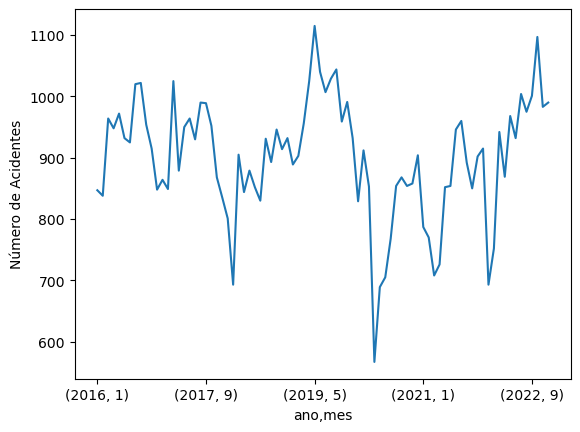

In [5]:
grouped_by_month = df.groupby(['ano', 'mes']).size()
grouped_by_month.plot(kind='line')
plt.ylabel('Número de Acidentes')

3. Repita o gráfico acima por ano apenas.

Text(0, 0.5, 'Número de Acidentes')

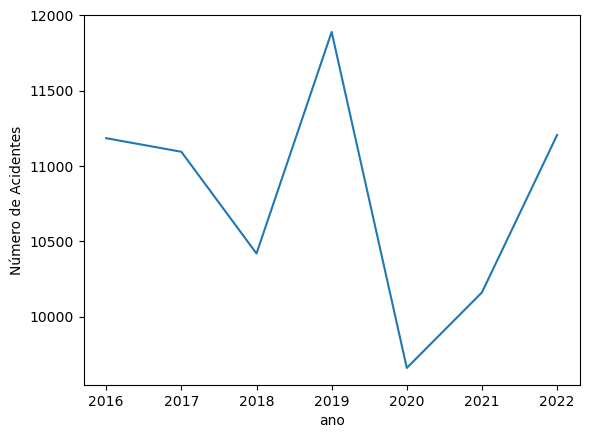

In [6]:
grouped_by_year = df.groupby('ano').size()
grouped_by_year.plot(kind='line')
plt.ylabel('Número de Acidentes')

4. Faça um gráfico de barras por ano indicandos os tipos de acidentes mais comuns no ano.

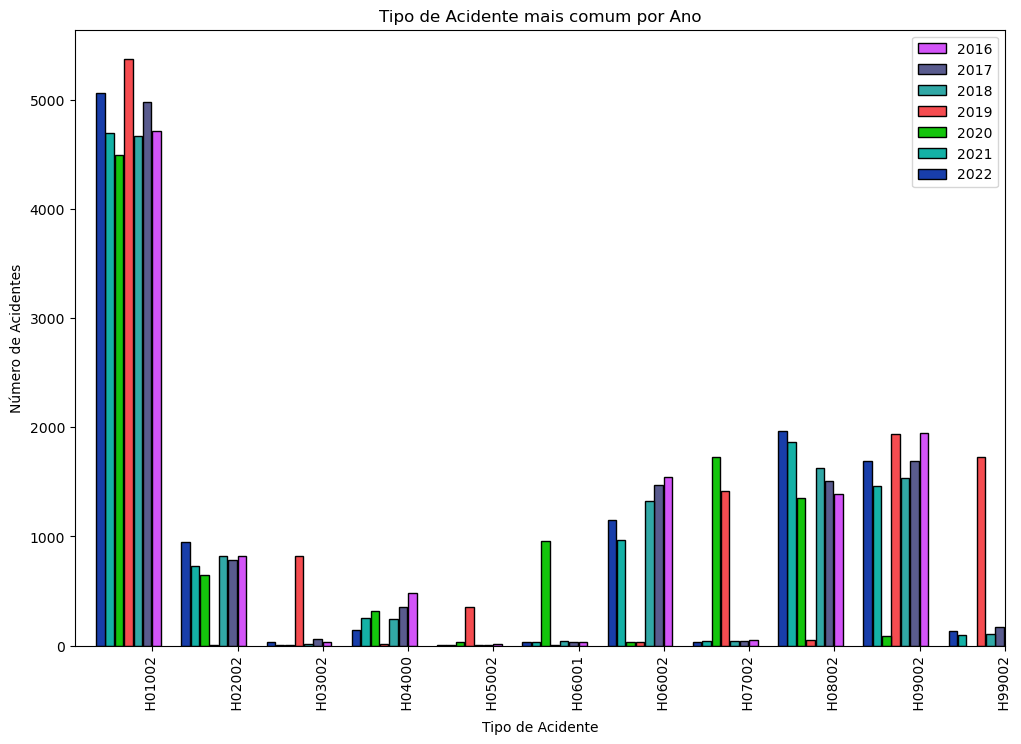

In [7]:
import random
import random

years = df.get('ano').unique().tolist()

colors = ['#D354F8', '#595B8E', '#31A8A6', '#F54C50', '#14C50C', '#14B1A6', '#183EAA']

for i in range(len(colors)):
    while i > 0 and colors[i] == colors[i-1]:
        colors[i] = '#' + ''.join(random.choices('0123456789ABCDEF', k=6))

spacing = 1
bar_width = 0.1
num_accident_kinds = df.groupby('tipo_acidente').size()

plt.figure(figsize=(12, 8))
for i, year in enumerate(years):
    accidents_per_year = df[df.get('ano') == year].groupby('tipo_acidente').size()
    ax = accidents_per_year.plot(kind='bar', color=colors[i], position=i * (bar_width + spacing), width=bar_width, label=year, edgecolor='black')

plt.title('Tipo de Acidente mais comum por Ano')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Acidentes')
plt.legend()

plt.show()

5. Repita o gráfico acima considerando gráficos fatais e não fatais.

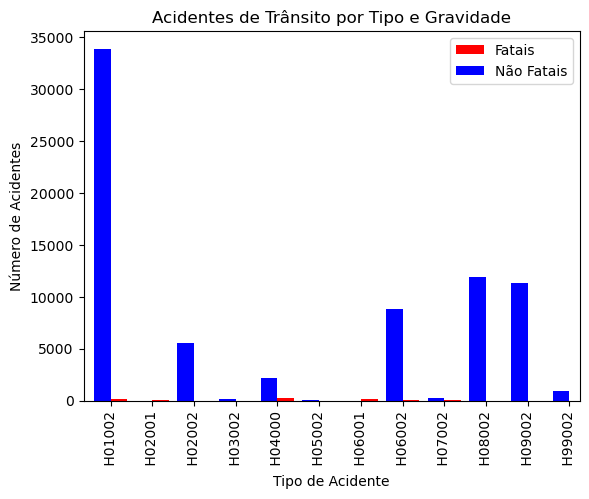

In [8]:
fatals = df[df.get('indicador_fatalidade') == 'SIM'].groupby('tipo_acidente').size()
non_fatals = df[df.get('indicador_fatalidade') == 'NÃO'].groupby('tipo_acidente').size()

ax = fatals.plot(kind='bar', color='red', position=0, width=0.4, label='Fatais')
non_fatals.plot(kind='bar', color='blue', position=1, width=0.4, ax=ax, label='Não Fatais')

plt.title('Acidentes de Trânsito por Tipo e Gravidade')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Acidentes')
plt.legend()

plt.show()

6. Faça a mesma análise por bairro e por acidentes fatais e não fatais

In [9]:
neighborhood_data = df.groupby('bairro').size()
neighborhood_data
neighborhood_records = {}
for neighborhood in neighborhood_data.index:
    records = df[df.get('bairro') == neighborhood]
    neighborhood_records[neighborhood] = records
neighborhood_records_fatals = {neighborhood: neighborhood_records[neighborhood][neighborhood_records[neighborhood].get('indicador_fatalidade') == 'SIM'] for neighborhood in neighborhood_records}
neighborhood_records_non_fatals = {neighborhood: neighborhood_records[neighborhood][neighborhood_records[neighborhood].get('indicador_fatalidade') == 'NÃO'] for neighborhood in neighborhood_records}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


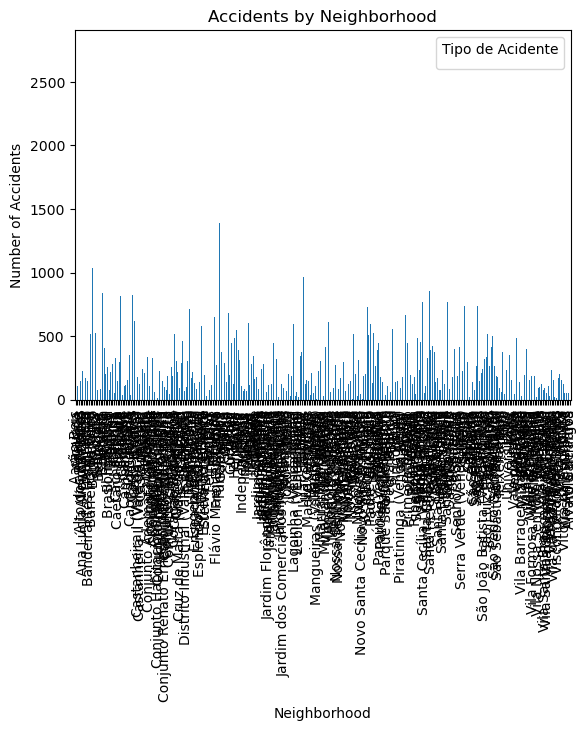

In [10]:
neighborhood_data.plot(kind="bar", stacked=True)
plt.title('Accidents by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Accidents')
plt.legend(title='Tipo de Acidente')
plt.show()

7. Plotar Mapa de Belo Horizonte por Tipo de Acidente:
- Faça um gráfico de dispersão das latitudes e longitudes. O mesmo deve parecer com o mapa de BH.  
Para entender bem os tipos de acidentes, faça gráficos por tipos diferentes de acidentes.

Text(0.5, 1.0, 'Mapa de Belo Horizonte')

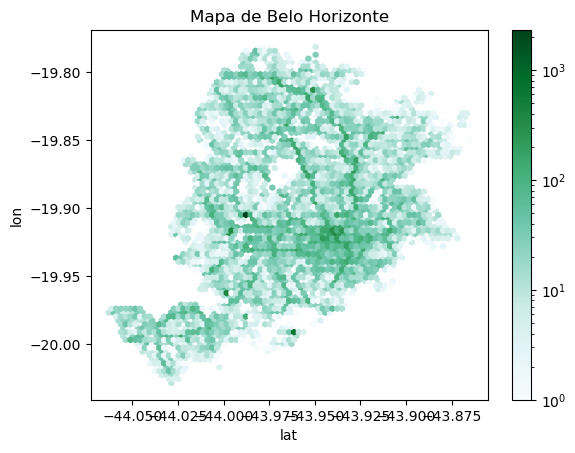

In [11]:
df.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Mapa de Belo Horizonte')


Os tipos de acidentes são :

In [12]:
df.get("desc_tipo_acidente").unique()

array(['QUEDA DE PESSOA DE VEICULO                        ',
       'ATROPELAMENTO DE PESSOA SEM VITIMA FATAL          ',
       'ABALROAMENTO COM VITIMA                           ',
       'COLISAO DE VEICULOS COM VITIMA                    ',
       'CHOQUE MECANICO COM VITIMA                        ',
       'CAPOTAMENTO/TOMBAMENTO COM VITIMA                 ',
       'OUTROS COM VITIMA                                 ',
       'QUEDA E/OU VAZAMENTO DE CARGA DE VEICULO C/ VITIMA',
       'ATROPELAMENTO DE PESSOA COM VITIMA FATAL          ',
       'QUEDA DE VEICULO COM VITIMA                       ',
       'ATROPELAMENTO DE ANIMAL COM VITIMA                ',
       'CAPOTAMENTO/TOMBAMENTO SEM VITIMA                 '], dtype=object)

Acidentes de queda de pessoa por veículo por latitude e longitude :

Text(0.5, 1.0, 'Acidentes de queda de pessoa por veículo por latitude e longitude')

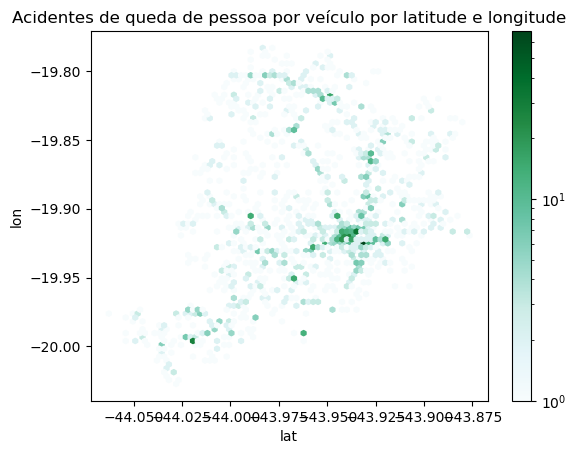

In [13]:
grouped_by_QUEDA_DE_PESSOA_DE_VEICULO = df[(df.get('desc_tipo_acidente') == 'QUEDA DE PESSOA DE VEICULO                        ')]
grouped_by_QUEDA_DE_PESSOA_DE_VEICULO.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de queda de pessoa por veículo por latitude e longitude')


Acidentes de atropelamento de pessoa sem vítima fatal por latitude e longitude :

Text(0.5, 1.0, 'Acidentes de atropelamento de pessoa sem vítima fatal por latitude e longitude')

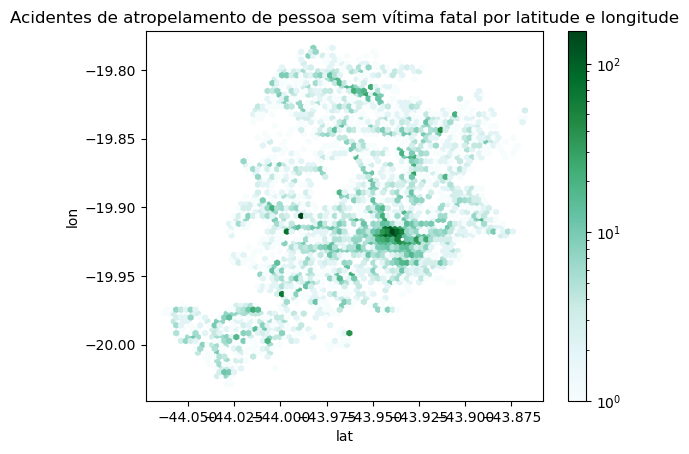

In [14]:
grouped_by_ATROPELAMENTO_DE_PESSOA_SEM_VITIMA_FATAL = df[(df.get('desc_tipo_acidente') == 'ATROPELAMENTO DE PESSOA SEM VITIMA FATAL          ')]
grouped_by_ATROPELAMENTO_DE_PESSOA_SEM_VITIMA_FATAL.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de atropelamento de pessoa sem vítima fatal por latitude e longitude')


Acidentes de abalroamento com vítima por latitude e longitude :

Text(0.5, 1.0, 'Acidentes de abalroamento com vítima por latitude e longitude')

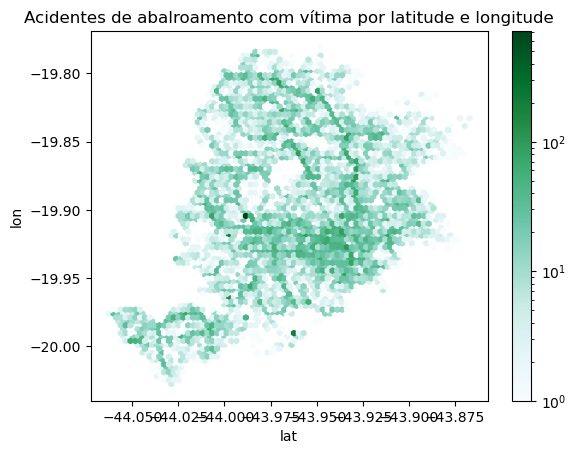

In [15]:
grouped_by_ABALROAMENTO_COM_VITIMA = df[(df.get('desc_tipo_acidente') == 'ABALROAMENTO COM VITIMA                           ')]
grouped_by_ABALROAMENTO_COM_VITIMA.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de abalroamento com vítima por latitude e longitude')

Acidentes de colisão de veículos com vítima por latitude e longitude :

Text(0.5, 1.0, 'Acidentes de colisão de veículos com vítima por latitude e longitude')

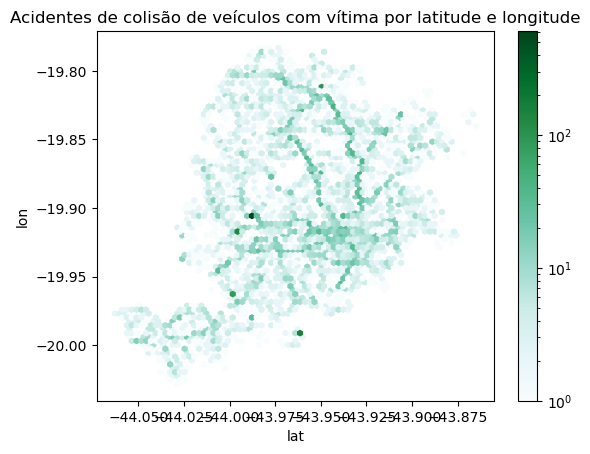

In [16]:
grouped_by_COLISAO_DE_VEICULOS_COM_VITIMA= df[(df.get('desc_tipo_acidente') == 'COLISAO DE VEICULOS COM VITIMA                    ')]
grouped_by_COLISAO_DE_VEICULOS_COM_VITIMA.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de colisão de veículos com vítima por latitude e longitude')

Acidentes de choque mecânico com vítima por latitude e longitude :

Text(0.5, 1.0, 'Acidentes de choque mecânico com vítima por latitude e longitude')

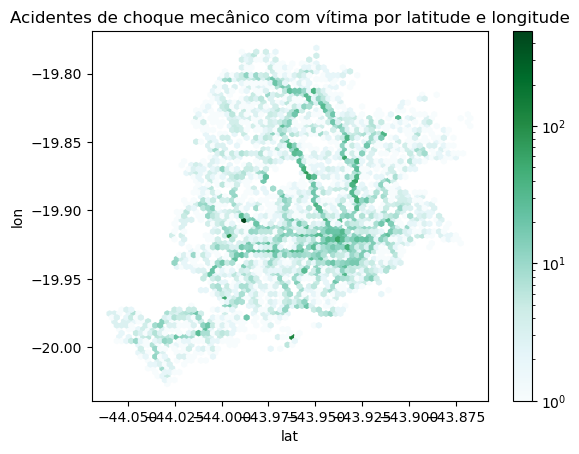

In [17]:
grouped_by_CHOQUE_MECANICO_COM_VITIMA= df[(df.get('desc_tipo_acidente') == 'CHOQUE MECANICO COM VITIMA                        ')]
grouped_by_CHOQUE_MECANICO_COM_VITIMA.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de choque mecânico com vítima por latitude e longitude')

Acidentes de capotamento ou tombamento com vítima por latitude e longitude :

Text(0.5, 1.0, 'Acidentes de capotamento ou tombamento com vítima por latitude e longitude')

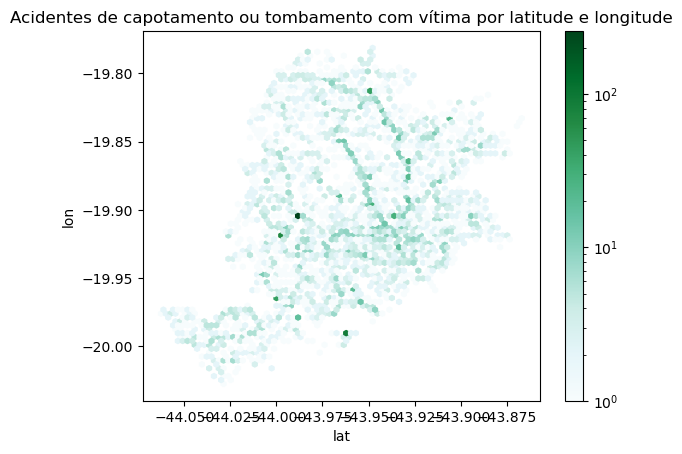

In [18]:
grouped_by_CAPOTAMENTO_ou_TOMBAMENTO_COM_VITIMA= df[(df.get('desc_tipo_acidente') == 'CAPOTAMENTO/TOMBAMENTO COM VITIMA                 ')]
grouped_by_CAPOTAMENTO_ou_TOMBAMENTO_COM_VITIMA.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de capotamento ou tombamento com vítima por latitude e longitude')

Acidentes de outros com vítima por latitude e longitude :

Text(0.5, 1.0, 'Acidentes de outros com vítima por latitude e longitude')

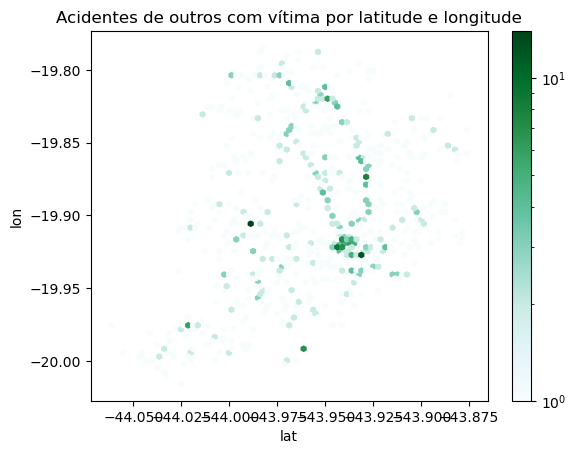

In [19]:
grouped_by_OUTROS_COM_VITIMA= df[(df.get('desc_tipo_acidente') == 'OUTROS COM VITIMA                                 ')]
grouped_by_OUTROS_COM_VITIMA.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de outros com vítima por latitude e longitude')

Acidentes de queda e ou vazamento de carga de veículo com vítima por latitude e longitude :

Text(0.5, 1.0, 'Acidentes de queda e ou vazamento de carga de veículo com vítima por latitude e longitude')

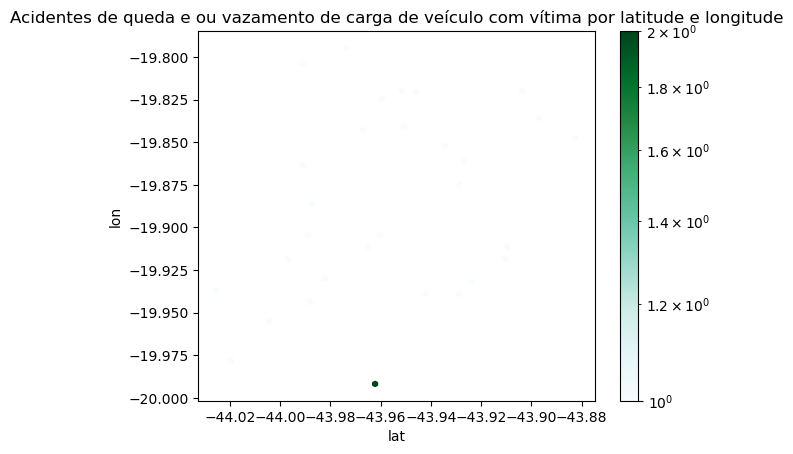

In [20]:
grouped_by_QUEDA_E_OU_VAZAMENTO_DE_CARGA_DE_VEICULO_COM_VITIMA= df[(df.get('desc_tipo_acidente') == 'QUEDA E/OU VAZAMENTO DE CARGA DE VEICULO C/ VITIMA')]
grouped_by_QUEDA_E_OU_VAZAMENTO_DE_CARGA_DE_VEICULO_COM_VITIMA.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de queda e ou vazamento de carga de veículo com vítima por latitude e longitude')

Acidentes de atropelamento de pessoa com vítima fatal por latitude e longitude :

Text(0.5, 1.0, 'Acidentes de atropelamento de pessoa com vítima fatal por latitude e longitude')

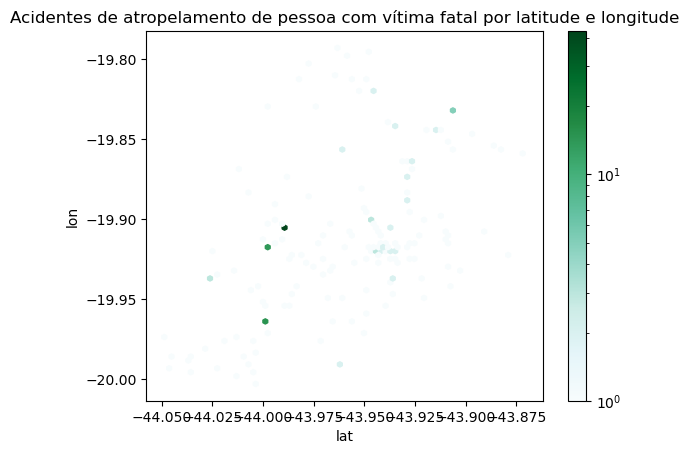

In [21]:
grouped_by_ATROPELAMENTO_DE_PESSOA_COM_VITIMA_FATAL= df[(df.get('desc_tipo_acidente') == 'ATROPELAMENTO DE PESSOA COM VITIMA FATAL          ')]
grouped_by_ATROPELAMENTO_DE_PESSOA_COM_VITIMA_FATAL.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de atropelamento de pessoa com vítima fatal por latitude e longitude')

Acidentes de queda de veículo com vítima por latitude e longitude :

Text(0.5, 1.0, 'Acidentes de queda de veículo com vítima por latitude e longitude')

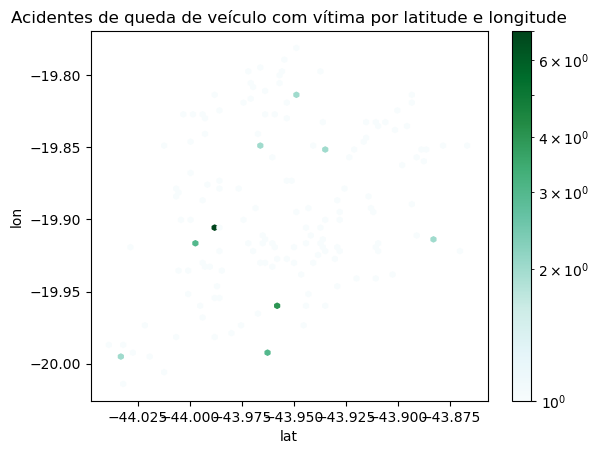

In [22]:
grouped_by_QUEDA_DE_VEICULO_COM_VITIMA= df[(df.get('desc_tipo_acidente') == 'QUEDA DE VEICULO COM VITIMA                       ')]
grouped_by_QUEDA_DE_VEICULO_COM_VITIMA.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de queda de veículo com vítima por latitude e longitude')

Acidentes de atropelamento de animal com vítima por latitude e longitude : 

Text(0.5, 1.0, 'Acidentes de atropelamento de animal com vítima por latitude e longitude')

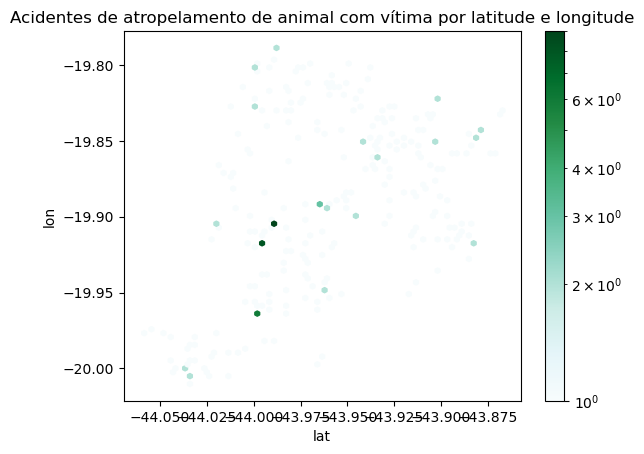

In [23]:
grouped_by_ATROPELAMENTO_DE_ANIMAL_COM_VITIMA= df[(df.get('desc_tipo_acidente') == 'ATROPELAMENTO DE ANIMAL COM VITIMA                ')]
grouped_by_ATROPELAMENTO_DE_ANIMAL_COM_VITIMA.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de atropelamento de animal com vítima por latitude e longitude')

Acidentes de capotamento ou tombamento sem vítima por latitude e longitude :

Text(0.5, 1.0, 'Acidentes de capotamento ou tombamento sem vítima por latitude e longitude')

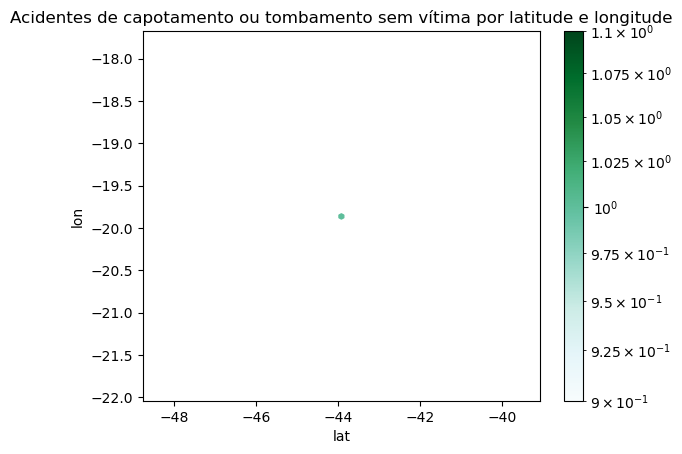

In [24]:
grouped_by_CAPOTAMENTO_ou_TOMBAMENTO_SEM_VITIMA= df[(df.get('desc_tipo_acidente') == 'CAPOTAMENTO/TOMBAMENTO SEM VITIMA                 ')]
grouped_by_CAPOTAMENTO_ou_TOMBAMENTO_SEM_VITIMA.plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log'
 )
plt.title('Acidentes de capotamento ou tombamento sem vítima por latitude e longitude')

8. Plotar Intervalo de Confiança via Bootstrap do Número de Acidentes por Mês: 
- Utilize a técnica de bootstrap para calcular intervalos de confiança para o número de acidentes em cada mês. Plote esses intervalos juntamente com a média mensal dos acidentes para visualizar a variabilidade e a confiança das estimativas. 

9. Vamos brincar de regressão. Inicialmente, faça um gráfico de dispersão onde o eixo X é o número de acidentes em 2019, 2020 ou 2021. Serão três gráficos. Cada ponto no gráfico vai corresponder a um bairro.

Criando todos os mergs :

In [25]:
cont = df.groupby(['bairro', 'ano']).size().reset_index()
dados_2019 = cont[cont.get('ano') == 2019]
dados_2020 = cont[cont.get('ano') == 2020]
dados_2021 = cont[cont.get('ano') == 2021]
merge_by_acidentes_2019_e_2020 = dados_2019.merge(
  dados_2020,
  on='bairro')
merge_by_acidentes_2019_e_2021 = dados_2019.merge(
  dados_2021,
  on='bairro')
merge_by_acidentes_2020_e_2021 = dados_2020.merge(
  dados_2021,
  on='bairro')

In [26]:
merge_by_acidentes_2019_e_2020

,bairro,ano_x,0_x,ano_y,0_y
0,Aarão Reis,2019,47,2020,60
1,Acaiaca,2019,11,2020,10
2,Adelaide,2019,39,2020,25
3,Alto dos Pinheiros,2019,19,2020,16
4,Alípio de Melo,2019,35,2020,24
...,...,...,...,...,...
288,Vitória,2019,19,2020,25
289,Vitória da Conquista,2019,7,2020,6
290,Washington Pires,2019,5,2020,9
291,Álvaro Camargos,2019,10,2020,12


In [27]:
merge_by_acidentes_2019_e_2021

,bairro,ano_x,0_x,ano_y,0_y
0,Aarão Reis,2019,47,2021,66
1,Acaiaca,2019,11,2021,16
2,Adelaide,2019,39,2021,35
3,Alto dos Pinheiros,2019,19,2021,26
4,Alípio de Melo,2019,35,2021,39
...,...,...,...,...,...
288,Vitória,2019,19,2021,16
289,Vitória da Conquista,2019,7,2021,11
290,Washington Pires,2019,5,2021,5
291,Álvaro Camargos,2019,10,2021,6


In [28]:
merge_by_acidentes_2020_e_2021

,bairro,ano_x,0_x,ano_y,0_y
0,Aarão Reis,2020,60,2021,66
1,Acaiaca,2020,10,2021,16
2,Adelaide,2020,25,2021,35
3,Alto dos Pinheiros,2020,16,2021,26
4,Alípio de Melo,2020,24,2021,39
...,...,...,...,...,...
287,Vitória,2020,25,2021,16
288,Vitória da Conquista,2020,6,2021,11
289,Washington Pires,2020,9,2021,5
290,Álvaro Camargos,2020,12,2021,6


Text(0, 0.5, 'Número de acidentes por bairro em 2020')

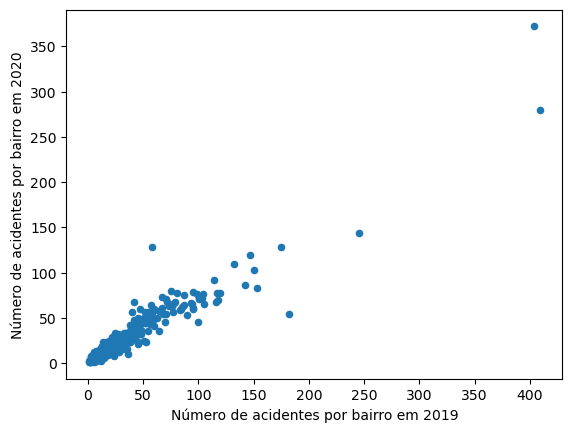

In [29]:
merge_by_acidentes_2019_e_2020.plot(kind = "scatter", x = "0_x", y = "0_y" )
plt.xlabel('Número de acidentes por bairro em 2019')
plt.ylabel('Número de acidentes por bairro em 2020')

Text(0, 0.5, 'Número de acidentes por bairro em 2021')

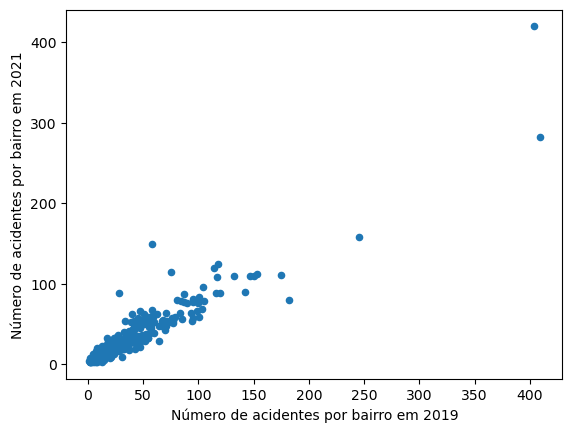

In [30]:
merge_by_acidentes_2019_e_2021.plot(kind = "scatter", x = "0_x", y = "0_y" )
plt.xlabel('Número de acidentes por bairro em 2019')
plt.ylabel('Número de acidentes por bairro em 2021')

Text(0, 0.5, 'Número de acidentes por bairro em 2021')

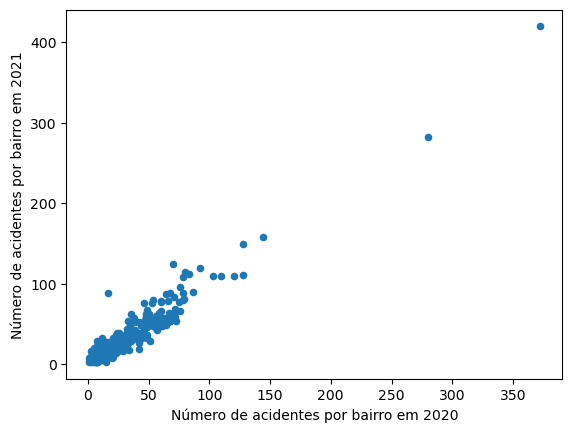

In [31]:
merge_by_acidentes_2020_e_2021.plot(kind = "scatter", x = "0_x", y = "0_y" )
plt.xlabel('Número de acidentes por bairro em 2020')
plt.ylabel('Número de acidentes por bairro em 2021')

10. Use o Número de Acidentes por bairro de 2019 para Prever 2022:
- Também use os de 2020
- Por fim use os de 2022
- Aplique métodos de previsão (como modelos de regressão) para estimar o número de acidentes em 2023, utilizando os dados passados
- Avalie os erros do modelo e discuta as limitações
- Compare os três modelos. A pandemia teve algum impacto, qual?

Primeiramente, vamos definir uma função que expressa  X ou  Y (colunas de um DataFrame) em unidades padronizadas :

In [32]:
def standard_units(col):
    return (col - col.mean()) / np.std(col)

Agora uma função que calcula a correlação  R a partir das unidades padronizadas:

In [33]:
def calculate_r(df, x, y):
    '''Returns the average value of the product of x and y, 
       when both are measured in standard units.'''
    x_su = standard_units(df.get(x))
    y_su = standard_units(df.get(y))
    return (x_su * y_su).mean()

Criando o merge para prever o número de acidentes por bairro de 2022 usando 2019 :  

In [34]:
dados_2022 = cont[cont.get('ano') == 2022]
merge_by_acidentes_2019_e_2022 = dados_2019.merge(
  dados_2022,
  on='bairro')
merge_by_acidentes_2019_e_2022

,bairro,ano_x,0_x,ano_y,0_y
0,Aarão Reis,2019,47,2022,63
1,Acaiaca,2019,11,2022,12
2,Adelaide,2019,39,2022,31
3,Alto dos Pinheiros,2019,19,2022,24
4,Alípio de Melo,2019,35,2022,31
...,...,...,...,...,...
286,Vitória,2019,19,2022,19
287,Vitória da Conquista,2019,7,2022,6
288,Washington Pires,2019,5,2022,8
289,Álvaro Camargos,2019,10,2022,12


Funções para calcular o a e o b no caso geral :

In [35]:
def slope(df, x, y):
    "Returns the slope of the regression line between columns x and y in df (in original units)."
    r = calculate_r(df, x, y)
    return r * np.std(df.get(y)) / np.std(df.get(x))

def intercept(df, x, y):
    "Returns the intercept of the regression line between columns x and y in df (in original units)."
    return df.get(y).mean() - slope(df, x, y) * df.get(x).mean()

In [36]:
slope_2019_2022 = slope(merge_by_acidentes_2019_e_2022, "0_x", "0_y")
intercept_2019_2022 = intercept(merge_by_acidentes_2019_e_2022, "0_x", "0_y")

In [37]:
predict_2022_usando_2019 = merge_by_acidentes_2019_e_2022.assign(num_2022_previsto = slope_2019_2022 * merge_by_acidentes_2019_e_2022.get("0_y") + intercept_2019_2022)
predict_2022_usando_2019

,bairro,ano_x,0_x,ano_y,0_y,num_2022_previsto
0,Aarão Reis,2019,47,2022,63,57.561025
1,Acaiaca,2019,11,2022,12,13.713688
2,Adelaide,2019,39,2022,31,30.048970
3,Alto dos Pinheiros,2019,19,2022,24,24.030708
4,Alípio de Melo,2019,35,2022,31,30.048970
...,...,...,...,...,...,...
286,Vitória,2019,19,2022,19,19.731950
287,Vitória da Conquista,2019,7,2022,6,8.555177
288,Washington Pires,2019,5,2022,8,10.274681
289,Álvaro Camargos,2019,10,2022,12,13.713688


In [38]:

comparacao_previsto_real_2022_usando_2019 = predict_2022_usando_2019.assign(residual= (predict_2022_usando_2019.get("0_y") - predict_2022_usando_2019.get("num_2022_previsto")))
comparacao_previsto_real_2022_usando_2019

,bairro,ano_x,0_x,ano_y,0_y,num_2022_previsto,residual
0,Aarão Reis,2019,47,2022,63,57.561025,5.438975
1,Acaiaca,2019,11,2022,12,13.713688,-1.713688
2,Adelaide,2019,39,2022,31,30.048970,0.951030
3,Alto dos Pinheiros,2019,19,2022,24,24.030708,-0.030708
4,Alípio de Melo,2019,35,2022,31,30.048970,0.951030
...,...,...,...,...,...,...,...
286,Vitória,2019,19,2022,19,19.731950,-0.731950
287,Vitória da Conquista,2019,7,2022,6,8.555177,-2.555177
288,Washington Pires,2019,5,2022,8,10.274681,-2.274681
289,Álvaro Camargos,2019,10,2022,12,13.713688,-1.713688


Agora, usando 2020:

In [39]:
merge_by_acidentes_2020_e_2022 = dados_2020.merge(
  dados_2022,
  on='bairro')
merge_by_acidentes_2020_e_2022

,bairro,ano_x,0_x,ano_y,0_y
0,Aarão Reis,2020,60,2022,63
1,Acaiaca,2020,10,2022,12
2,Adelaide,2020,25,2022,31
3,Alto dos Pinheiros,2020,16,2022,24
4,Alípio de Melo,2020,24,2022,31
...,...,...,...,...,...
286,Vitória,2020,25,2022,19
287,Vitória da Conquista,2020,6,2022,6
288,Washington Pires,2020,9,2022,8
289,Álvaro Camargos,2020,12,2022,12


In [40]:
slope_2020_2022 = slope(merge_by_acidentes_2020_e_2022, "0_x", "0_y")
intercept_2020_2022 = intercept(merge_by_acidentes_2020_e_2022, "0_x", "0_y")

In [41]:
predict_2022_usando_2020 = merge_by_acidentes_2020_e_2022.assign(num_2022_previsto = slope_2020_2022 * merge_by_acidentes_2020_e_2022.get("0_y") + intercept_2020_2022)
predict_2022_usando_2020

,bairro,ano_x,0_x,ano_y,0_y,num_2022_previsto
0,Aarão Reis,2020,60,2022,63,73.473589
1,Acaiaca,2020,10,2022,12,13.684818
2,Adelaide,2020,25,2022,31,35.959066
3,Alto dos Pinheiros,2020,16,2022,24,27.752764
4,Alípio de Melo,2020,24,2022,31,35.959066
...,...,...,...,...,...,...
286,Vitória,2020,25,2022,19,21.891120
287,Vitória da Conquista,2020,6,2022,6,6.650845
288,Washington Pires,2020,9,2022,8,8.995503
289,Álvaro Camargos,2020,12,2022,12,13.684818


In [42]:
comparacao_previsto_real_2022_usando_2020 = predict_2022_usando_2020.assign(residual= (predict_2022_usando_2020.get("0_y") - predict_2022_usando_2020.get("num_2022_previsto")))
comparacao_previsto_real_2022_usando_2020

,bairro,ano_x,0_x,ano_y,0_y,num_2022_previsto,residual
0,Aarão Reis,2020,60,2022,63,73.473589,-10.473589
1,Acaiaca,2020,10,2022,12,13.684818,-1.684818
2,Adelaide,2020,25,2022,31,35.959066,-4.959066
3,Alto dos Pinheiros,2020,16,2022,24,27.752764,-3.752764
4,Alípio de Melo,2020,24,2022,31,35.959066,-4.959066
...,...,...,...,...,...,...,...
286,Vitória,2020,25,2022,19,21.891120,-2.891120
287,Vitória da Conquista,2020,6,2022,6,6.650845,-0.650845
288,Washington Pires,2020,9,2022,8,8.995503,-0.995503
289,Álvaro Camargos,2020,12,2022,12,13.684818,-1.684818


Comparando o erro de previsão dos dois modelos :

In [43]:
residual_total_usando_2019 = ((comparacao_previsto_real_2022_usando_2019.get("residual") ** 2).sum()) / 291
residual_total_usando_2019

39.17828645346526

In [44]:
residual_total_usando_2020 = ((comparacao_previsto_real_2022_usando_2020.get("residual") ** 2).sum()) / 291
residual_total_usando_2020

92.17862044575266

Assim, concluimos que usar o número de acidentes por bairro de 2019 para prever os 2022 é melhor do que usar os número de acidentes por bairro de 2020.

Agora vamos prever os números de acidentes por bairro de 2023 :

11. Fazer Análises Adicionais de Interesse:
- Realize análises adicionais que sejam de seu interesse ou relevância para o projeto. Isso pode incluir a correlação entre diferentes variáveis, a análise de hotspots de acidentes, ou a investigação de fatores contribuintes para a gravidade dos acidentes.

Vamos analisar os hotspost de acidentes por região :

In [50]:
grouped_by_regiao = df.groupby("desc_regional").size().sort_values(ascending = False)
grouped_by_regiao

desc_regional
CENTRO-SUL         12900
PAMPULHA           10188
NOROESTE            9014
OESTE               8764
NORDESTE            7739
VENDA NOVA          6583
BARREIRO            6479
LESTE               6220
NORTE               5536
                    2196
dtype: int64

Assim concluimos que a região Centro-Sul é a regiao com mais acidentes.
- Agora vamos analisar qual é a região com mais acidentes por quilômetro quadrado,
fazendo uma rápida pesquisa as áreas são : Centro-Sul = 31,53 Pampulha = 47,13 Noroeste = 38,16 Oeste = 33,39 Nordeste = 39,59 Venda Nova = 27,80 Barreiro = 53,51 Leste = 28,52 Norte = 33,21

In [51]:
acidentes__por_km_centro_sul = 409,1
acidentes__por_km_pampulha = 216,1
acidentes__por_km_noroeste = 236,2
acidentes__por_km_oeste  = 262,4
acidentes__por_km_nordeste = 195,4
acidentes__por_km_venda_nova = 236,7
acidentes__por_km_barreiro = 121,0
acidentes__por_km_leste = 218,0
acidentes__por_km_norte = 166,6

A região Centro-Sul continua sendo a região com mais acidentes por quilômetro quadrado.


Agora vamos fazer a mesma analise por bairro:

In [52]:
grouped_by_bairro = df.groupby("bairro").size().sort_values(ascending = False)
grouped_by_bairro

bairro
Jardim Montanhês                        2770
Centro                                  2566
Funcionários                            1387
Barreiro de Cima                        1033
Lourdes                                  962
                                        ... 
Conjunto Habitacional Vale do Jatobá      13
Vila das Antenas                           9
Nova Pampulha                              7
Mangueiras (Vale do Jatobá)                5
Novo Santa Cecília (Vale do Jatobá)        3
Length: 296, dtype: int64

Observamos uma grande concentração de acidentes nos bairros, Jardim Montanhês e Centro, caracterizando os moairoes hotspots de acidentes em Belo Horizonte.

Vamos analisar agora os acidentes fatais : 

In [53]:
acidentes_fatais = df[df.get("indicador_fatalidade") == "SIM"]
acidentes_fatais

,numero_boletim,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,...,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,descricao_ups,ano,mes,lat,lon,bairro
data_boletim,,,,,,,,,,,,,,,,,,,,,
2016-01-07 15:54:00,2016-014209895-001,H06001,ATROPELAMENTO DE PESSOA COM VITIMA FATAL ...,1,BOM,1,ASFALTO,24,OESTE,POLICIA MILITAR,...,604394.37,7794721.04,SIM,SIM,NÃO INFORMADO,2016,7,-44.002425,-19.941150,Jardinópolis
2016-01-07 19:03:00,2016-014224486-001,H06001,ATROPELAMENTO DE PESSOA COM VITIMA FATAL ...,1,BOM,2,CONCRETO,22,NOROESTE,POLICIA MILITAR,...,606204.96,7796701.73,SIM,SIM,NÃO INFORMADO,2016,7,-43.985240,-19.923156,Coração Eucarístico
2016-01-12 16:48:00,2016-026065911-001,H01002,ABALROAMENTO COM VITIMA ...,2,CHUVA,1,ASFALTO,26,VENDA NOVA,POLICIA MILITAR,...,608932.89,7808965.54,SIM,SIM,NÃO INFORMADO,2016,12,-43.959901,-19.812198,Venda Nova
2016-01-14 22:20:00,2016-000710249-001,H99002,OUTROS COM VITIMA ...,2,CHUVA,1,ASFALTO,23,NORTE,POLICIA MILITAR,...,609829.67,7807202.61,SIM,SIM,NÃO INFORMADO,2016,1,-43.951235,-19.828076,Campo Alegre
2016-01-15 23:37:00,2016-001124317-001,H08002,CHOQUE MECANICO COM VITIMA ...,3,NEBLINA,1,ASFALTO,19,CENTRO-SUL,POLICIA MILITAR,...,614010.08,7792909.97,SIM,SIM,NÃO INFORMADO,2016,1,-43.910438,-19.956973,Mangabeiras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24 18:00:00,2022-051500903-001,H99002,OUTROS COM VITIMA ...,1,BOM,1,ASFALTO,19,CENTRO-SUL,POLICIA MILITAR,...,610439.67,7797408.23,SIM,SIM,NÃO INFORMADO,2022,11,-43.944825,-19.916537,Centro
2022-11-27 01:50:00,2022-051851904-001,H08002,CHOQUE MECANICO COM VITIMA ...,1,BOM,1,ASFALTO,19,CENTRO-SUL,POLICIA MILITAR,...,614267.03,7795308.48,SIM,SIM,NÃO INFORMADO,2022,11,-43.908132,-19.935288,Vila Santana do Cafezal
2022-12-03 03:00:00,2022-010761998-001,H09002,COLISAO DE VEICULOS COM VITIMA ...,1,BOM,1,ASFALTO,22,NOROESTE,POLICIA MILITAR,...,609064.30,7799818.18,SIM,SIM,NÃO INFORMADO,2022,3,-43.958107,-19.894840,Senhor Bom Jesus


In [54]:
acidentes_fatais.groupby("desc_tempo").size()

desc_tempo
BOM                445
CHUVA               66
NAO INFORMADO      140
NEBLINA              3
NUBLADO             15
dtype: int64

In [56]:
acidentes_fatais_com_tempo_ruim = 66 + 3 + 15
poropocao = acidentes_fatais_com_tempo_ruim / (669 - 140)
poropocao

0.15879017013232513

Considerando apenas os acidentes com o tempo informado, a proporção de acientes fatais com um tempo ruim(chuva ou neblina ou nublado) é de aproximadamente 16%, uma quantidade bem significativa, mostrando a influência do clima nos acidentes de trânsito.